In [1]:
/*clear all
set more off
macro drop _all
set seed 8675309

set scheme dubois */

In [1]:
%set graph_format svg

In [2]:
set scheme dubois
set linesize 255
set more off
quietly import excel using "https://github.com/jcolond/dnd/raw/master/dnd.xlsx", sheet("AGI") firstrow clear
quietly label define AGI_lab 1 "$-$30K" 2 "$30K-$48K" 3 "$48K-$75K" 4 "$75K-$110K" 5 "$110K +" 
quietly label values AGI AGI_lab
quietly rename Race_Ethnicity RE2
quietly encode RE2, generate(RE3)
quietly recode RE3 (1=4 Asian)(2=1 Black)(3=2 Latinx)(4=3 white), gen(Race_Ethnicity)

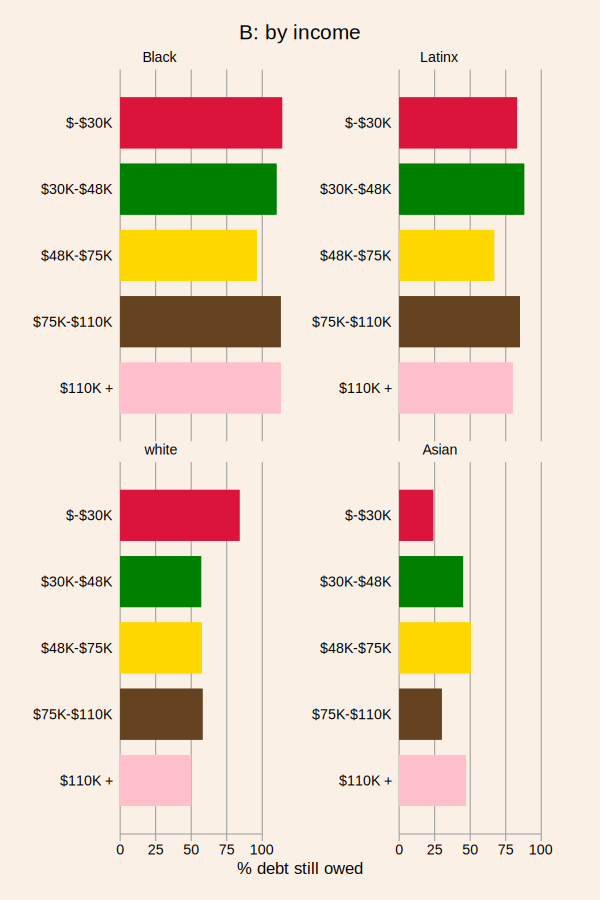

In [3]:
local opts asyvars showyvars xsize(4) ysize(6) name(AGI, replace) over(AGI, gap(30))
local opts `opts' ylabel(0(25)100, labsize(small)) ytitle("% debt still owed")
local by by(Race_Ethnicity, legend(off) title("B: by income") imargin(zero) note(""))
graph hbar Debt_ratio, `opts' `by'

In [4]:
quietly import excel using "https://github.com/jcolond/dnd/raw/master/dnd.xlsx", sheet("EFC") firstrow clear
quietly label define EFC_lab 1 "$0" 2 "$1-$2.6K" 3 "$2.6K-$7.2K" 4 "$7.2K-$15.6K" 5 "$15.6K+" 
quietly label values EFC EFC_lab
quietly rename Race_Ethnicity RE2
quietly encode RE2, generate(RE3)
quietly recode RE3 (1=4 Asian)(2=1 Black)(3=2 Latinx)(4=3 white), gen(Race_Ethnicity)

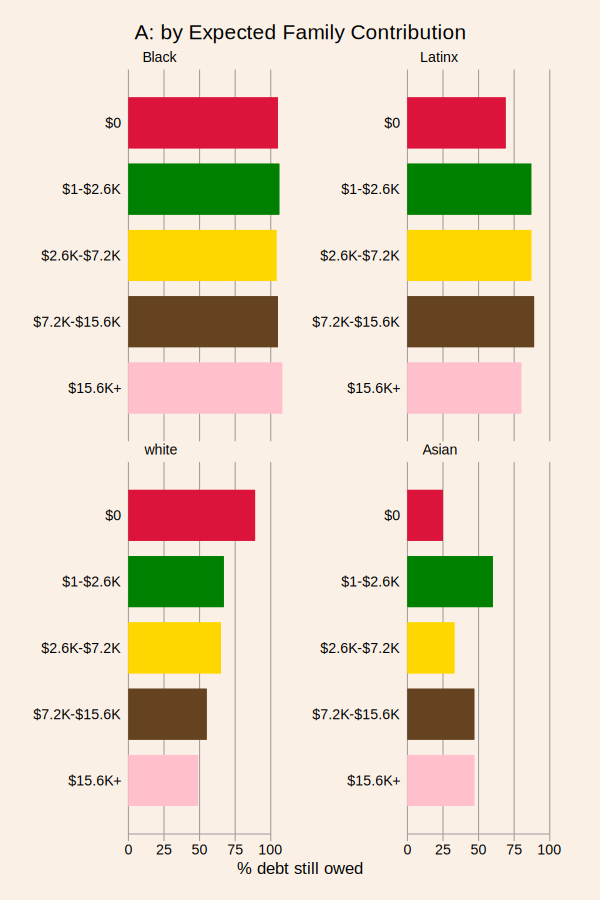

In [5]:
local over over(EFC, gap(30)) ytitle(% debt still owed) ylabel(0(25)100, labsize(small))
local asyvars asyvars showyvars xsize(4) ysize(6)  by(Race_Ethnicity, imargin(zero) legend(off)
local title title("A: by Expected Family Contribution") note("")) name(EFC, replace)

graph hbar Debt_ratio, `over' `asyvars' `title'

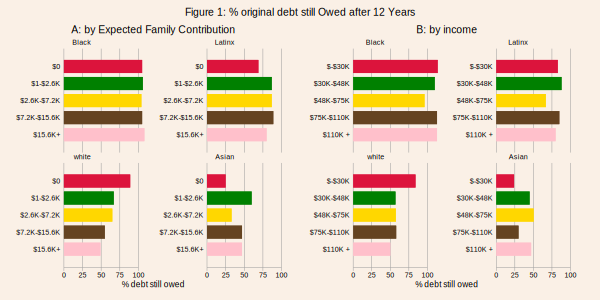

In [6]:
local imargin imargin(small) iscale(1)
local title title(Figure 1: % original debt still Owed after 12 Years)
local xsize xsize(8) ysize(4) name(AGIEFC, replace) rows(1)
graph combine EFC AGI, `imargin' `title' `xsize'

In [7]:
clear
quietly set obs `=20'
quietly gen race=4
quietly replace race=3 if _n<16
quietly replace race=1 if _n<11
quietly replace race=2 if _n<6
label define race 1 "Black" 2 "white" 3 "Latinx" 4 "Asian"
label values race race
quietly gen efc=1
quietly replace efc=2 if _n==2 | _n==7 | _n==12 | _n==17
quietly replace efc=3 if _n==3 | _n==8 | _n==13 | _n==18
quietly replace efc=4 if _n==4 | _n==9 | _n==14 | _n==19
quietly replace efc=5 if _n==5 | _n==10 | _n==15 | _n==20
quietly label define EFC_lab 1 "$0" 2 "$1-$2.6K" 3 "$2.6K-$7.2K" 4 "$7.2K-$15.6K" 5 "$15.6K+" 
quietly label values efc EFC_lab
quietly gen pcthelp=11.6368 if _n==1
quietly replace pcthelp=8.632 if _n==6
quietly replace pcthelp=13.0130 if _n==11
quietly replace pcthelp=9.3606 if _n==16
quietly replace pcthelp=15.2168 if _n==2
quietly replace pcthelp=11.3907 if _n==7
quietly replace pcthelp=15.0896 if _n==12
quietly replace pcthelp=22.6309 if _n==17
quietly replace pcthelp=16.0815 if _n==3
quietly replace pcthelp=7.6035 if _n==8
quietly replace pcthelp=15.4896 if _n==13
quietly replace pcthelp=22.4566 if _n==18
quietly replace pcthelp=21.5403 if _n==4
quietly replace pcthelp=9.5468 if _n==9
quietly replace pcthelp=18.0492 if _n==14
quietly replace pcthelp=. if _n==19
quietly replace pcthelp=25.6239 if _n==5
quietly replace pcthelp=30.1301 if _n==10
quietly replace pcthelp=16.1942 if _n==15
quietly replace pcthelp=. if _n==20
quietly rename race race2
quietly recode race2 (1=1 Black)(2=3 white)(3=2 Latinx)(4=4 Asian), gen(race)

In [8]:
set linesize 255
set more off

In [9]:
#delimit ;
local note1 note("Prior research on racialized student loan debt demonstrates that disparitie"
"s between blacks and whites are attributed to family wealth, postsecondary "
"careers, and personal net worth (Addo, Houle, and Simon 2016) . In particul"
"ar family wealth and postsecondary education play protective factors in lim"
"iting debt, while personal net worth influences payment of debt over time ("
"Houle and Addo 2018). We build on this research by looking more closely at "
"the relationship between family wealth and debt, using data from the Nation"
"al Center of Education Statistics collected from 2004 and 2009, for student"
"s finishing their first year of postsecondary education and then three and "
"six years after the start of their postsecondary education.  Controlling fo"
"r Adjusted Gross Income (AGI) of household and Expected Family Contribution"
" (EFC) we assess the relationship between race and student debt. We find th"
"at regardless of EFC bracket (Figure 1A), Blacks have the highest debt rati"
"o out of all race categories. Whites are the only race whose debt ratio dec"
"reases *consistently* as EFC increases. Blacks have the highest debt ratio "
"for each AGI category (Figure 1B). Whites have the lowest debt ratio among "
"all races for the top four highest AGI categories. Lastly Blacks receive th" ;
local note1 `note1' "e least overall (?) amount of help *from family or others* repaying loans a"
"t a rate of about 10 percent, compared with Whites at a rate of over 15 per"
"cent (I think we may need to include exact percentages for this). We contri"
"bute to the findings of previous research by focusing in greater detail on "
"measures of family wealth for both EFC and AGI. Our findings confirm that B"
"lacks have the highest debt ratios even when individuals come from families"
" in the highest income groups, and also receive the least amount of help wi"
"th loans. This may indicate that the EFC is an inadequate measure for famil"
"y wealth, and must be reevaluated in order to properly reflect the financia"
"l assistance students actually receive from parents. The implications of th"
"ese substantial racialized student debt disparities are that racialized ine"
"qualities will continue to subsist and may even widen in subsequent generat"
"ions.", justification(left) size(vsmall) position(3)) ;

#delimit cr

local over over(efc, gap(30)) ytitle("% receiving help") asyvars showyvars 
local xsize xsize(8) ysize(4) ylabel(0(10)30, labsize(small)) by(race, legend(off) imargin(zero)
local t2title t2title(Figure 2: % receiving help repaying debt, size(medsmall))
local t1title t1title(by Expected Family Contribution, size(medsmall))) name(PCTHELP, replace)

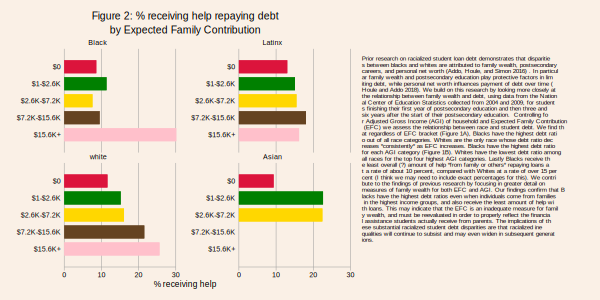

In [10]:
graph hbar pcthelp, `over' `xsize' `t2title' `note1' `t1title'

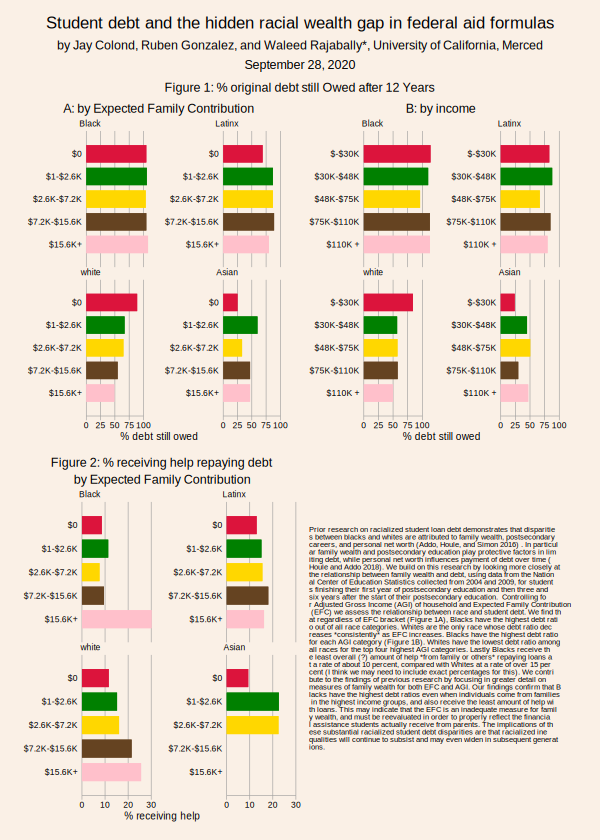

In [11]:
local title title(Student debt and the hidden racial wealth gap in federal aid formulas, size(small))
local subtitle subtitle("by Jay Colond, Ruben Gonzalez, and Waleed Rajabally*, University of California, Merced", size(vsmall))
local t2title t2title("September 28, 2020", size(vsmall)) iscale(.6) rows(2) xsize(10) ysize(14) imargin(small)
graph combine AGIEFC PCTHELP, `title' `subtitle' `t2title'